# Dependencies

In [1]:
import gzip
import os 
import sys
import math

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style("darkgrid")

In [3]:
from statistics import mean, median

# defined functions

In [4]:
def mymean(x: list) -> float:
    return float(sum(x) / len(x))  


def mymedian(x: list) -> float:
    length = len(x)
    x.sort()
    if length % 2 == 1:
        idx = length // 2
        return float(x[idx])
    elif length % 2 ==0:
        idx = length // 2
        return float((x[idx] + x[idx-1]) / 2)
    else:
        return None
    

In [5]:
ls1 = [1, 2, 4, 3, 5, 6]
ls2 = [1, 2, 4, 3, 3, 5, 6]
print(mymedian(ls1))
print(mymedian(ls2))
print(mymean(ls1))
print(mymean(ls2))

print(mean(ls1))
print(mean(ls2))
print(median(ls1))
print(median(ls2))

3.5
3.0
3.5
3.4285714285714284
3.5
3.4285714285714284
3.5
3


# tasks
## 统计智人染色体的基因密度
- UCSC table (GTF, GFF3)
- python-base style statistics
- pandas statistics
- Fig1, plot count per chromsome
- Fig2, plot gene distribution per chromsome
- Fig3, plot gene density per chromsome

### python base

In [6]:
# 1~22 XY | Mt
aim_chroms = list(map(str, range(1, 23, 1))) + ["X", "Y"]
aim_chroms

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 'X',
 'Y']

In [7]:
dt_genes = {k: [] for k in aim_chroms}
dt_genes

{'1': [],
 '2': [],
 '3': [],
 '4': [],
 '5': [],
 '6': [],
 '7': [],
 '8': [],
 '9': [],
 '10': [],
 '11': [],
 '12': [],
 '13': [],
 '14': [],
 '15': [],
 '16': [],
 '17': [],
 '18': [],
 '19': [],
 '20': [],
 '21': [],
 '22': [],
 'X': [],
 'Y': []}

In [8]:
# 准备 gene list / annotation info
# ucsc genome browser

In [9]:
ucsc_gene_table = "ucsc/ucsc_hg38_genes-and-gene-predictions_NCBI-refseq_refGene_knownGene.tsv.gz"

In [10]:
f = gzip.open(ucsc_gene_table, "rt")

header = f.readline()[1:].rstrip().split("\t")

# print(header)

for line in f:
    _ls = line.strip().split("\t")
    # print(_ls)
    chrom = _ls[2][3:]
    name = _ls[12]
    # print(chrom, name)  # str
    # break
    # scaffold  chrUn_dxxxxxxxxx chr1_altxxxxxxxxx
    
    if "_" in chrom:
        continue
    if chrom in dt_genes:
        dt_genes[chrom].append(name)
        
f.close()

In [11]:
dt_genes["X"][:10]

['CCNB3',
 'CCNB3',
 'PCDH11X',
 'PCDH11X',
 'ZDHHC15',
 'SRPX2',
 'CYLC1',
 'PCDH11X',
 'CYLC1',
 'PCDH11X']

In [12]:
dt_lens = {
    k: len(list(set(v)))
    for k, v in dt_genes.items()    
}
dt_lens

{'1': 2842,
 '2': 1821,
 '3': 1563,
 '4': 1089,
 '5': 1314,
 '6': 1454,
 '7': 1349,
 '8': 1033,
 '9': 1112,
 '10': 1116,
 '11': 1675,
 '12': 1391,
 '13': 632,
 '14': 949,
 '15': 1012,
 '16': 1144,
 '17': 1574,
 '18': 430,
 '19': 1792,
 '20': 781,
 '21': 413,
 '22': 643,
 'X': 1158,
 'Y': 143}

In [13]:
s = 0 

for k, v in dt_lens.items():
    s += v
    
s

28430

In [14]:
df = pd.DataFrame.from_dict(dt_lens.items())
df.columns= ["chrom", "count"]
df["count"].sum()

28430

### pandas

In [15]:
df = pd.read_csv(ucsc_gene_table, header=0, index_col=None, sep="\t")
df

,#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames
0,0,NM_000299,chr1,+,201283451,201332993,201283702,201328836,15,"201283451,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,2,0,0,0,1,2,0,-1,"
1,0,NM_001276351,chr1,-,67092165,67134970,67093004,67127240,8,"67092165,67095234,67096251,67115351,67125751,6...","67093604,67095421,67096321,67115464,67125909,6...",0,C1orf141,cmpl,cmpl,"0,2,1,2,0,0,-1,-1,"
2,0,NM_001005337,chr1,+,201283505,201332989,201283702,201328836,14,"201283505,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,0,0,0,1,2,0,-1,"
3,0,NM_001276352,chr1,-,67092165,67134970,67093579,67127240,9,"67092165,67096251,67103237,67111576,67115351,6...","67093604,67096321,67103382,67111644,67115464,6...",0,C1orf141,cmpl,cmpl,"2,1,0,1,2,0,0,-1,-1,"
4,0,NR_075077,chr1,-,67092165,67134970,67134970,67134970,10,"67092165,67096251,67103237,67111576,67113613,6...","67093604,67096321,67103382,67111644,67113756,6...",0,C1orf141,unk,unk,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88814,586,NM_001368250,chr22_KI270734v1_random,-,137997,161592,138479,156446,14,"137997,138742,142193,143613,144748,145003,1466...","138667,138831,142292,143789,144895,145096,1467...",0,LOC102724788,cmpl,cmpl,"1,2,2,0,0,0,2,0,0,1,1,2,0,-1,"
88815,586,NM_001368249,chr22_KI270734v1_random,-,138085,161592,138479,161586,14,"138085,138742,142193,143613,144748,145003,1466...","138667,138831,142292,143789,144895,145096,1467...",0,LOC102724788,cmpl,cmpl,"1,2,2,0,0,0,2,0,0,1,1,2,0,0,"
88816,586,NM_001368242,chr22_KI270734v1_random,+,131590,137393,131645,136994,5,"131590,131835,135442,136158,136844,","131755,131996,135543,136299,137393,",0,LOC102724770,cmpl,cmpl,"0,2,1,0,0,"
88817,586,NM_005675,chr22_KI270734v1_random,+,131590,137393,131645,136994,5,"131590,131835,135442,136158,136844,","131755,131996,135543,136299,137393,",0,DGCR6,cmpl,cmpl,"0,2,1,0,0,"


In [16]:
df = df[~df["chrom"].str.contains("_")].copy()
df

,#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames
0,0,NM_000299,chr1,+,201283451,201332993,201283702,201328836,15,"201283451,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,2,0,0,0,1,2,0,-1,"
1,0,NM_001276351,chr1,-,67092165,67134970,67093004,67127240,8,"67092165,67095234,67096251,67115351,67125751,6...","67093604,67095421,67096321,67115464,67125909,6...",0,C1orf141,cmpl,cmpl,"0,2,1,2,0,0,-1,-1,"
2,0,NM_001005337,chr1,+,201283505,201332989,201283702,201328836,14,"201283505,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,0,0,0,1,2,0,-1,"
3,0,NM_001276352,chr1,-,67092165,67134970,67093579,67127240,9,"67092165,67096251,67103237,67111576,67115351,6...","67093604,67096321,67103382,67111644,67115464,6...",0,C1orf141,cmpl,cmpl,"2,1,0,1,2,0,0,-1,-1,"
4,0,NR_075077,chr1,-,67092165,67134970,67134970,67134970,10,"67092165,67096251,67103237,67111576,67113613,6...","67093604,67096321,67103382,67111644,67113756,6...",0,C1orf141,unk,unk,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78358,972,NM_007081,chr22,-,50767505,50783636,50768775,50782294,9,"50767505,50769040,50769454,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,"
78359,972,NM_001350014,chr22,-,50767505,50783636,50768775,50782294,10,"50767505,50769040,50769424,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,-1,"
78360,972,NM_001130923,chr22,-,50767505,50783636,50768775,50782294,10,"50767505,50769040,50769424,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,-1,"
78361,972,NM_001097,chr22,+,50738203,50745339,50738235,50745207,5,"50738203,50739270,50739693,50744060,50744652,","50738312,50739474,50739977,50744206,50745339,",0,ACR,cmpl,cmpl,"0,2,2,1,0,"


In [17]:
df["chrom"] = df.chrom.str[3:]
df

,#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames
0,0,NM_000299,1,+,201283451,201332993,201283702,201328836,15,"201283451,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,2,0,0,0,1,2,0,-1,"
1,0,NM_001276351,1,-,67092165,67134970,67093004,67127240,8,"67092165,67095234,67096251,67115351,67125751,6...","67093604,67095421,67096321,67115464,67125909,6...",0,C1orf141,cmpl,cmpl,"0,2,1,2,0,0,-1,-1,"
2,0,NM_001005337,1,+,201283505,201332989,201283702,201328836,14,"201283505,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,0,0,0,1,2,0,-1,"
3,0,NM_001276352,1,-,67092165,67134970,67093579,67127240,9,"67092165,67096251,67103237,67111576,67115351,6...","67093604,67096321,67103382,67111644,67115464,6...",0,C1orf141,cmpl,cmpl,"2,1,0,1,2,0,0,-1,-1,"
4,0,NR_075077,1,-,67092165,67134970,67134970,67134970,10,"67092165,67096251,67103237,67111576,67113613,6...","67093604,67096321,67103382,67111644,67113756,6...",0,C1orf141,unk,unk,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78358,972,NM_007081,22,-,50767505,50783636,50768775,50782294,9,"50767505,50769040,50769454,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,"
78359,972,NM_001350014,22,-,50767505,50783636,50768775,50782294,10,"50767505,50769040,50769424,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,-1,"
78360,972,NM_001130923,22,-,50767505,50783636,50768775,50782294,10,"50767505,50769040,50769424,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,-1,"
78361,972,NM_001097,22,+,50738203,50745339,50738235,50745207,5,"50738203,50739270,50739693,50744060,50744652,","50738312,50739474,50739977,50744206,50745339,",0,ACR,cmpl,cmpl,"0,2,2,1,0,"


In [18]:
df.chrom.unique() # numpy

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'M', 'X', 'Y', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22'], dtype=object)

In [19]:
# df[~(df.chrom == "M")]

In [20]:
df = df[df.chrom.map(lambda x: x in aim_chroms)].copy()
df

,#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames
0,0,NM_000299,1,+,201283451,201332993,201283702,201328836,15,"201283451,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,2,0,0,0,1,2,0,-1,"
1,0,NM_001276351,1,-,67092165,67134970,67093004,67127240,8,"67092165,67095234,67096251,67115351,67125751,6...","67093604,67095421,67096321,67115464,67125909,6...",0,C1orf141,cmpl,cmpl,"0,2,1,2,0,0,-1,-1,"
2,0,NM_001005337,1,+,201283505,201332989,201283702,201328836,14,"201283505,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,0,0,0,1,2,0,-1,"
3,0,NM_001276352,1,-,67092165,67134970,67093579,67127240,9,"67092165,67096251,67103237,67111576,67115351,6...","67093604,67096321,67103382,67111644,67115464,6...",0,C1orf141,cmpl,cmpl,"2,1,0,1,2,0,0,-1,-1,"
4,0,NR_075077,1,-,67092165,67134970,67134970,67134970,10,"67092165,67096251,67103237,67111576,67113613,6...","67093604,67096321,67103382,67111644,67113756,6...",0,C1orf141,unk,unk,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78358,972,NM_007081,22,-,50767505,50783636,50768775,50782294,9,"50767505,50769040,50769454,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,"
78359,972,NM_001350014,22,-,50767505,50783636,50768775,50782294,10,"50767505,50769040,50769424,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,-1,"
78360,972,NM_001130923,22,-,50767505,50783636,50768775,50782294,10,"50767505,50769040,50769424,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,-1,"
78361,972,NM_001097,22,+,50738203,50745339,50738235,50745207,5,"50738203,50739270,50739693,50744060,50744652,","50738312,50739474,50739977,50744206,50745339,",0,ACR,cmpl,cmpl,"0,2,2,1,0,"


In [21]:
df.drop_duplicates(subset=["chrom", "name2"], keep="first", inplace=True)
df

,#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames
0,0,NM_000299,1,+,201283451,201332993,201283702,201328836,15,"201283451,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,2,0,0,0,1,2,0,-1,"
1,0,NM_001276351,1,-,67092165,67134970,67093004,67127240,8,"67092165,67095234,67096251,67115351,67125751,6...","67093604,67095421,67096321,67115464,67125909,6...",0,C1orf141,cmpl,cmpl,"0,2,1,2,0,0,-1,-1,"
5,1,NM_001042681,1,-,8352403,8817640,8355086,8656297,23,"8352403,8355418,8356099,8358195,8359763,836011...","8355120,8355599,8356246,8358916,8359986,836149...",0,RERE,cmpl,cmpl,"2,1,1,0,2,0,0,0,1,1,0,0,0,2,0,2,2,1,0,0,1,0,-1,"
7,1,NR_038261,1,-,41847188,42035934,42035934,42035934,4,"41847188,41848870,41918412,42035806,","41848445,41849089,41918524,42035934,",0,HIVEP3,unk,unk,"-1,-1,-1,-1,"
9,1,NM_001281956,1,-,33513997,34165230,33519517,34165097,71,"33513997,33519464,33519811,33521462,33523306,3...","33516570,33519677,33519950,33521550,33523419,3...",0,CSMD2,cmpl,cmpl,"-1,2,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78336,971,NM_012324,22,+,50600792,50613976,50600818,50610779,12,"50600792,50601788,50603222,50603625,50603840,5...","50600883,50601894,50603498,50603719,50605064,5...",0,MAPK8IP2,cmpl,cmpl,"0,2,0,0,1,1,2,1,0,0,2,2,"
78337,972,NM_001350007,22,-,50767505,50783636,50768775,50782294,10,"50767505,50769040,50769454,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,-1,"
78350,972,NR_134637,22,-,50735828,50738169,50738169,50738169,2,"50735828,50737389,","50737104,50738169,",0,LOC105373100,unk,unk,"-1,-1,"
78351,972,NR_026981,22,+,50757085,50799637,50799637,50799637,4,"50757085,50783119,50785172,50798654,","50757326,50783294,50785293,50799637,",0,RPL23AP82,unk,unk,"-1,-1,-1,-1,"


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28430 entries, 0 to 78361
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   #bin          28430 non-null  int64 
 1   name          28430 non-null  object
 2   chrom         28430 non-null  object
 3   strand        28430 non-null  object
 4   txStart       28430 non-null  int64 
 5   txEnd         28430 non-null  int64 
 6   cdsStart      28430 non-null  int64 
 7   cdsEnd        28430 non-null  int64 
 8   exonCount     28430 non-null  int64 
 9   exonStarts    28430 non-null  object
 10  exonEnds      28430 non-null  object
 11  score         28430 non-null  int64 
 12  name2         28430 non-null  object
 13  cdsStartStat  28430 non-null  object
 14  cdsEndStat    28430 non-null  object
 15  exonFrames    28430 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.7+ MB


In [23]:
df.isna().sum()

#bin            0
name            0
chrom           0
strand          0
txStart         0
txEnd           0
cdsStart        0
cdsEnd          0
exonCount       0
exonStarts      0
exonEnds        0
score           0
name2           0
cdsStartStat    0
cdsEndStat      0
exonFrames      0
dtype: int64

In [24]:
df.isna().sum(axis=1)

0        0
1        0
5        0
7        0
9        0
        ..
78336    0
78337    0
78350    0
78351    0
78361    0
Length: 28430, dtype: int64

In [25]:
df.groupby("chrom")["name2"].count().to_frame()

,name2
chrom,
1,2842
10,1116
11,1675
12,1391
13,632
14,949
15,1012
16,1144
17,1574


In [26]:
df_count_genes = df.groupby("chrom")["name2"].count().to_frame()
df_count_genes.columns = ["count"]
df_count_genes

,count
chrom,
1,2842
10,1116
11,1675
12,1391
13,632
14,949
15,1012
16,1144
17,1574


In [27]:
# aim_chroms
df_count_genes = df_count_genes.loc[aim_chroms,].copy()
df_count_genes

,count
chrom,
1,2842
2,1821
3,1563
4,1089
5,1314
6,1454
7,1349
8,1033
9,1112


In [28]:
df_count_genes.reset_index(inplace=True)
df_count_genes

,chrom,count
0,1,2842
1,2,1821
2,3,1563
3,4,1089
4,5,1314
5,6,1454
6,7,1349
7,8,1033
8,9,1112
9,10,1116


## plot

### plot count per chromosome

<Axes: xlabel='chrom', ylabel='count'>

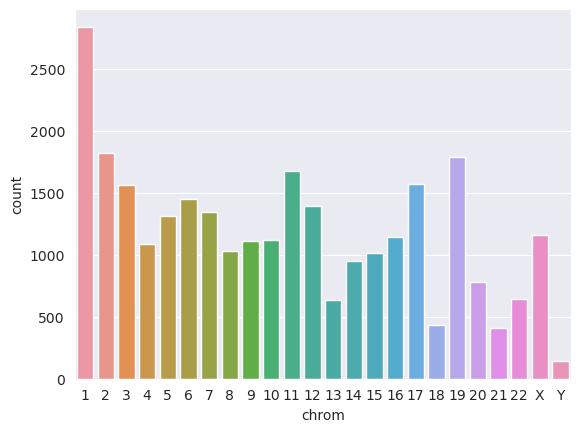

In [29]:
sns.barplot(data=df_count_genes, x="chrom", y="count")

In [30]:
df_count_genes["log2_count"] = df_count_genes["count"].map(math.log2)
df_count_genes

,chrom,count,log2_count
0,1,2842,11.472691
1,2,1821,10.830515
2,3,1563,10.610102
3,4,1089,10.088788
4,5,1314,10.359750
5,6,1454,10.505812
6,7,1349,10.397675
7,8,1033,10.012625
8,9,1112,10.118941
9,10,1116,10.124121


<Axes: xlabel='chrom', ylabel='log2_count'>

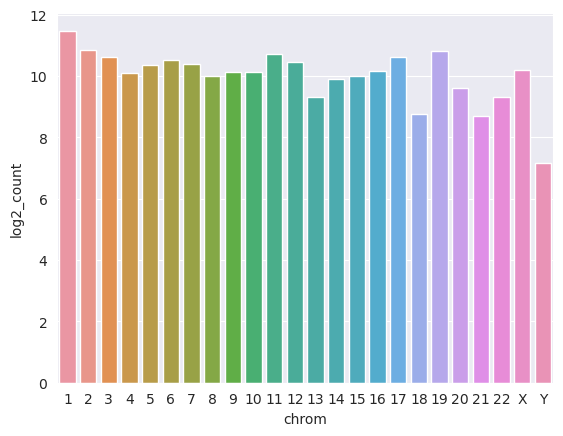

In [31]:
sns.barplot(data=df_count_genes, x="chrom", y="log2_count")

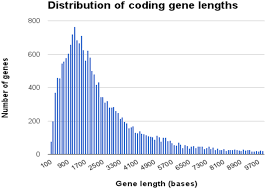

In [32]:
df.isna().sum()

#bin            0
name            0
chrom           0
strand          0
txStart         0
txEnd           0
cdsStart        0
cdsEnd          0
exonCount       0
exonStarts      0
exonEnds        0
score           0
name2           0
cdsStartStat    0
cdsEndStat      0
exonFrames      0
dtype: int64

In [33]:
df.head()

,#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames
0,0,NM_000299,1,+,201283451,201332993,201283702,201328836,15,"201283451,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,2,0,0,0,1,2,0,-1,"
1,0,NM_001276351,1,-,67092165,67134970,67093004,67127240,8,"67092165,67095234,67096251,67115351,67125751,6...","67093604,67095421,67096321,67115464,67125909,6...",0,C1orf141,cmpl,cmpl,"0,2,1,2,0,0,-1,-1,"
5,1,NM_001042681,1,-,8352403,8817640,8355086,8656297,23,"8352403,8355418,8356099,8358195,8359763,836011...","8355120,8355599,8356246,8358916,8359986,836149...",0,RERE,cmpl,cmpl,"2,1,1,0,2,0,0,0,1,1,0,0,0,2,0,2,2,1,0,0,1,0,-1,"
7,1,NR_038261,1,-,41847188,42035934,42035934,42035934,4,"41847188,41848870,41918412,42035806,","41848445,41849089,41918524,42035934,",0,HIVEP3,unk,unk,"-1,-1,-1,-1,"
9,1,NM_001281956,1,-,33513997,34165230,33519517,34165097,71,"33513997,33519464,33519811,33521462,33523306,3...","33516570,33519677,33519950,33521550,33523419,3...",0,CSMD2,cmpl,cmpl,"-1,2,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1..."


In [34]:
df["txEnd"].max() / 1_000_000

248.919146

In [35]:
df["category"] = pd.cut(x=df["txEnd"] / 1_000_000, bins=range(0,250,1))
df

,#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames,category
0,0,NM_000299,1,+,201283451,201332993,201283702,201328836,15,"201283451,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,2,0,0,0,1,2,0,-1,","(201, 202]"
1,0,NM_001276351,1,-,67092165,67134970,67093004,67127240,8,"67092165,67095234,67096251,67115351,67125751,6...","67093604,67095421,67096321,67115464,67125909,6...",0,C1orf141,cmpl,cmpl,"0,2,1,2,0,0,-1,-1,","(67, 68]"
5,1,NM_001042681,1,-,8352403,8817640,8355086,8656297,23,"8352403,8355418,8356099,8358195,8359763,836011...","8355120,8355599,8356246,8358916,8359986,836149...",0,RERE,cmpl,cmpl,"2,1,1,0,2,0,0,0,1,1,0,0,0,2,0,2,2,1,0,0,1,0,-1,","(8, 9]"
7,1,NR_038261,1,-,41847188,42035934,42035934,42035934,4,"41847188,41848870,41918412,42035806,","41848445,41849089,41918524,42035934,",0,HIVEP3,unk,unk,"-1,-1,-1,-1,","(42, 43]"
9,1,NM_001281956,1,-,33513997,34165230,33519517,34165097,71,"33513997,33519464,33519811,33521462,33523306,3...","33516570,33519677,33519950,33521550,33523419,3...",0,CSMD2,cmpl,cmpl,"-1,2,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1...","(34, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78336,971,NM_012324,22,+,50600792,50613976,50600818,50610779,12,"50600792,50601788,50603222,50603625,50603840,5...","50600883,50601894,50603498,50603719,50605064,5...",0,MAPK8IP2,cmpl,cmpl,"0,2,0,0,1,1,2,1,0,0,2,2,","(50, 51]"
78337,972,NM_001350007,22,-,50767505,50783636,50768775,50782294,10,"50767505,50769040,50769454,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,-1,","(50, 51]"
78350,972,NR_134637,22,-,50735828,50738169,50738169,50738169,2,"50735828,50737389,","50737104,50738169,",0,LOC105373100,unk,unk,"-1,-1,","(50, 51]"
78351,972,NR_026981,22,+,50757085,50799637,50799637,50799637,4,"50757085,50783119,50785172,50798654,","50757326,50783294,50785293,50799637,",0,RPL23AP82,unk,unk,"-1,-1,-1,-1,","(50, 51]"


In [36]:
df_cut = df.groupby(["chrom", "category"])["name2"].count().to_frame().reset_index()
df_cut.rename(columns={"name2": "count"}, inplace=True)
df_cut

,chrom,category,count
0,1,"(0, 1]",36
1,1,"(1, 2]",57
2,1,"(2, 3]",21
3,1,"(3, 4]",20
4,1,"(4, 5]",3
...,...,...,...
5971,Y,"(244, 245]",0
5972,Y,"(245, 246]",0
5973,Y,"(246, 247]",0
5974,Y,"(247, 248]",0


In [37]:
df_cut["category"] = df_cut["category"].map(lambda x: str(x).replace("]", "").split(",")[-1]).astype(int)
df_cut

,chrom,category,count
0,1,1,36
1,1,2,57
2,1,3,21
3,1,4,20
4,1,5,3
...,...,...,...
5971,Y,245,0
5972,Y,246,0
5973,Y,247,0
5974,Y,248,0


In [38]:
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976 entries, 0 to 5975
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   chrom     5976 non-null   object
 1   category  5976 non-null   int64 
 2   count     5976 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 140.2+ KB


In [39]:
df_cut.isna().sum()

chrom       0
category    0
count       0
dtype: int64

#### use R ggplot2
```
pip install rpy2
```

In [40]:
%load_ext rpy2.ipython

In [41]:
%%R
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0


System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to create bus connection: Host is down


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [42]:
%%R -i df_cut
# typeof(df_cut)
df_cut = tibble(df_cut)
df_cut

# A tibble: 5,976 × 3
   chrom category count
   <chr>    <int> <int>
 1 1            1    36
 2 1            2    57
 3 1            3    21
 4 1            4    20
 5 1            5     3
 6 1            6     2
 7 1            7    24
 8 1            8     7
 9 1            9    10
10 1           10    20
# ℹ 5,966 more rows
# ℹ Use `print(n = ...)` to see more rows


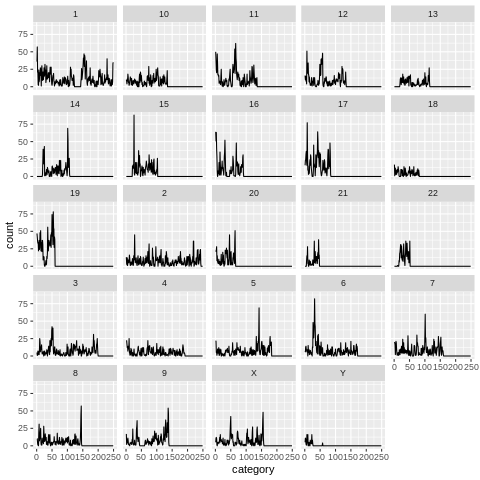

In [43]:
%%R
g = ggplot(data=df_cut) + geom_line(aes(x=category, y=count)) + facet_wrap(~chrom, scales="fixed")
g

In [44]:
%%R
ggsave("2022-11-07_distribution_of_gen_density_per_chromsome.pdf", g, height=10, width=20)

#### python lets\_plot
```
pip install lets_plot  # jetbrains
```

In [45]:
from lets_plot import *
LetsPlot.setup_html()

In [46]:
g = ggplot(data=df_cut) + geom_line(aes(x="category", y="count")) + facet_wrap("chrom", scales="fixed")
g

In [47]:
ggsave(g,"2022-11-07_distribution_of_gen_density_per_chromsome.html", path=".", iframe=False)

'/home/caogaoxiang/jupyter_file/basic_python/project_3/2022-11-07_distribution_of_gen_density_per_chromsome.html'

### plot gene density per chromosome

In [48]:
df_count_genes

,chrom,count,log2_count
0,1,2842,11.472691
1,2,1821,10.830515
2,3,1563,10.610102
3,4,1089,10.088788
4,5,1314,10.359750
5,6,1454,10.505812
6,7,1349,10.397675
7,8,1033,10.012625
8,9,1112,10.118941
9,10,1116,10.124121


In [49]:
df_chrom_lens = pd.read_csv(
    "hg38_only_chromosome.fa.fai",
    header=None,
    index_col=None,
    sep="\t",
    usecols=[0,1],
    names=["chrom", "length"]
)

df_chrom_lens["chrom"] = df_chrom_lens["chrom"].str[3:]
df_chrom_lens = df_chrom_lens[df_chrom_lens["chrom"].map(lambda x: x in aim_chroms)]
df_chrom_lens

,chrom,length
0,1,248956422
1,2,242193529
2,3,198295559
3,4,190214555
4,5,181538259
5,6,170805979
6,7,159345973
7,8,145138636
8,9,138394717
9,10,133797422


In [50]:
print(df_count_genes.head())
print(df_chrom_lens.head())
df_density = pd.merge(left=df_count_genes, right=df_chrom_lens, on="chrom", how="left")
df_density

  chrom  count  log2_count
0     1   2842   11.472691
1     2   1821   10.830515
2     3   1563   10.610102
3     4   1089   10.088788
4     5   1314   10.359750
  chrom     length
0     1  248956422
1     2  242193529
2     3  198295559
3     4  190214555
4     5  181538259


,chrom,count,log2_count,length
0,1,2842,11.472691,248956422
1,2,1821,10.830515,242193529
2,3,1563,10.610102,198295559
3,4,1089,10.088788,190214555
4,5,1314,10.359750,181538259
5,6,1454,10.505812,170805979
6,7,1349,10.397675,159345973
7,8,1033,10.012625,145138636
8,9,1112,10.118941,138394717
9,10,1116,10.124121,133797422


In [51]:
df_density["density"] = df_density["count"] / df_density["length"] * 1_000_000
df_density

,chrom,count,log2_count,length,density
0,1,2842,11.472691,248956422,11.415652
1,2,1821,10.830515,242193529,7.518781
2,3,1563,10.610102,198295559,7.882173
3,4,1089,10.088788,190214555,5.725114
4,5,1314,10.359750,181538259,7.238144
5,6,1454,10.505812,170805979,8.512583
6,7,1349,10.397675,159345973,8.465856
7,8,1033,10.012625,145138636,7.117333
8,9,1112,10.118941,138394717,8.034989
9,10,1116,10.124121,133797422,8.340968


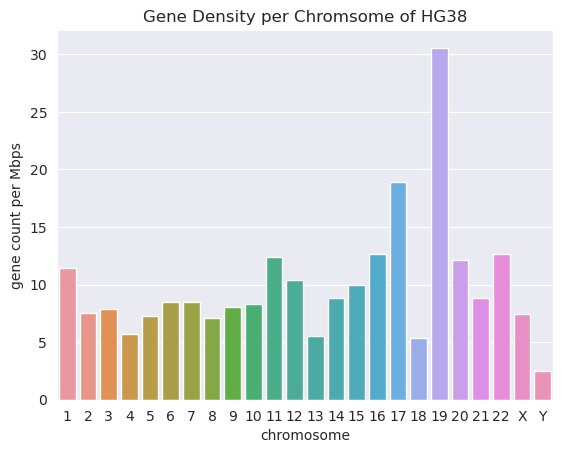

In [52]:
# sns.barplot(x=df_density["chrom"], y=df_density["density"])
ax = sns.barplot(data=df_density, x="chrom", y="density")
# ax.__dir__()
ax.axes.set_xlabel("chromosome")
ax.axes.set_ylabel("gene count per Mbps")
ax.set_title("Gene Density per Chromsome of HG38")

plt.savefig("gene_density_per_chromsome.pdf")

In [53]:
%%R
df_cut %>% group_by(chrom) %>% summarize(total=sum(count))

# A tibble: 24 × 2
   chrom total
   <chr> <int>
 1 1      2842
 2 10     1116
 3 11     1675
 4 12     1391
 5 13      632
 6 14      949
 7 15     1012
 8 16     1144
 9 17     1574
10 18      430
# ℹ 14 more rows
# ℹ Use `print(n = ...)` to see more rows


## 读取 Genbank 文件并完成计算
- genbank文件下载
- load genbank文件（Biopython）
- gene 的 feature 进行基本统计（CDS, exon）
    - min
    - max
    - mean
    - median

### 文件下载

In [54]:
# Ensembl (per chromosome) 
# RefSeq (per transcript) 

### load genbank file

In [55]:
ensembl_gb = "genbank/Homo_sapiens.hg38.Ensembl.GRCh38.109.gbff.gz"
test_ensemnl_gb = "genbank/Homo_sapiens.GRCh38.109.chromosome.18.dat.gz"
test_ensemnl_gb2 = "genbank/Homo_sapiens.GRCh38.109.chromosome.MT.dat.gz"
RefSeq_gb = "genbank/Homo_sapiens.hg38.RefSeq_GRCh38.latest.gbff.gz"

In [56]:
# pip/conda/mamba install biopython

In [57]:
from Bio import SeqIO
from Bio import __version__ as biov


biov

'1.81'

In [58]:
SeqIO.parse?

Signature: SeqIO.parse(handle, format, alphabet=None)
Docstring:
Turn a sequence file into an iterator returning SeqRecords.

Arguments:
 - handle   - handle to the file, or the filename as a string
   (note older versions of Biopython only took a handle).
 - format   - lower case string describing the file format.
 - alphabet - no longer used, should be None.

Typical usage, opening a file to read in, and looping over the record(s):

>>> from Bio import SeqIO
>>> filename = "Fasta/sweetpea.nu"
>>> for record in SeqIO.parse(filename, "fasta"):
...    print("ID %s" % record.id)
...    print("Sequence length %i" % len(record))
ID gi|3176602|gb|U78617.1|LOU78617
Sequence length 309

For lazy-loading file formats such as twobit, for which the file contents
is read on demand only, ensure that the file remains open while extracting
sequence data.

If you have a string 'data' containing the file contents, you must
first turn this into a handle in order to parse it:

>>> data = ">Alpha\nACCGGA

In [59]:
test_ensemnl_gb

'genbank/Homo_sapiens.GRCh38.109.chromosome.18.dat.gz'

In [60]:
for record in SeqIO.parse(test_ensemnl_gb, format="genbank"):
    print(record.id)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte

In [61]:
# file ok
for record in SeqIO.parse(test_ensemnl_gb[:-3], format="genbank"):
    print(record.id)

FileNotFoundError: [Errno 2] No such file or directory: 'genbank/Homo_sapiens.GRCh38.109.chromosome.18.dat'

In [62]:
for record in SeqIO.parse(
        gzip.open(test_ensemnl_gb, "rt"), 
        format="genbank"):
    print(record.id)

18GRCh38


In [63]:
ensembl_gb

'genbank/Homo_sapiens.hg38.Ensembl.GRCh38.109.gbff.gz'

In [64]:
for record in SeqIO.parse(
        gzip.open(ensembl_gb, "rt"), 
        format="genbank"):
    print(record.id)

1GRCh38
2GRCh38
3GRCh38
4GRCh38
5GRCh38
6GRCh38
7GRCh38
8GRCh38
9GRCh38
10GRCh38
11GRCh38
12GRCh38
13GRCh38
14GRCh38
15GRCh38
16GRCh38
17GRCh38
18GRCh38
19GRCh38
20GRCh38
21GRCh38
22GRCh38
XGRCh38
chromosome:GRCh38:Y:2781480:56887902:1
chromosome:GRCh38:Y:1:10000:1
chromosome:GRCh38:Y:57217416:57227415:1
MTGRCh38


In [65]:
for record in SeqIO.parse(
        gzip.open(test_ensemnl_gb, "rt"), 
        format="genbank"):
    print(record.id)

18GRCh38


In [66]:
record

SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN'), id='18GRCh38', name='18', description='Homo sapiens chromosome 18 GRCh38 full sequence 1..80373285 reannotated via EnsEMBL', dbxrefs=[])

In [67]:
record.id

'18GRCh38'

In [68]:
record.seq

Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN')

In [69]:
record.seq[:100]

Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN')

In [70]:
len(record.seq)

80373285

In [71]:
len(record)

80373285

In [72]:
record.name

'18'

In [73]:
record.description

'Homo sapiens chromosome 18 GRCh38 full sequence 1..80373285 reannotated via EnsEMBL'

In [74]:
record[0]

'N'

In [75]:
record.seq[0]

'N'

In [76]:
dir(record)
# record.__dir__()

['__add__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_per_letter_annotations',
 '_seq',
 '_set_per_letter_annotations',
 '_set_seq',
 'annotations',
 'count',
 'dbxrefs',
 'description',
 'features',
 'format',
 'id',
 'islower',
 'isupper',
 'letter_annotations',
 'lower',
 'name',
 'reverse_complement',
 'seq',
 'translate',
 'upper']

In [77]:
# record.features

In [78]:
record.features[0]

SeqFeature(SimpleLocation(ExactPosition(0), ExactPosition(80373285), strand=1), type='source', qualifiers=...)

In [79]:
record.features[1]

SeqFeature(SimpleLocation(ExactPosition(316736), ExactPosition(500722), strand=-1), type='gene', qualifiers=...)

In [80]:
record.features[1].type

'gene'

In [81]:
record.features[10]

SeqFeature(CompoundLocation([SimpleLocation(ExactPosition(5084991), ExactPosition(5085228), strand=1), SimpleLocation(ExactPosition(5095545), ExactPosition(5095815), strand=1)], 'join'), type='misc_RNA', location_operator='join', qualifiers=...)

In [82]:
record.features[100]

SeqFeature(CompoundLocation([SimpleLocation(ExactPosition(1359386), ExactPosition(1359590), strand=-1), SimpleLocation(ExactPosition(1358725), ExactPosition(1358760), strand=-1), SimpleLocation(ExactPosition(1275965), ExactPosition(1276087), strand=-1), SimpleLocation(ExactPosition(1273360), ExactPosition(1273533), strand=-1), SimpleLocation(ExactPosition(1272441), ExactPosition(1272511), strand=-1), SimpleLocation(ExactPosition(1269175), ExactPosition(1269852), strand=-1)], 'join'), type='misc_RNA', location_operator='join', qualifiers=...)

In [83]:
record.features[1000]

SeqFeature(SimpleLocation(ExactPosition(50457886), ExactPosition(50458795), strand=1), type='misc_RNA', qualifiers=...)

In [84]:
len(record.features[1000])

909

In [85]:
record.features[1003]

SeqFeature(CompoundLocation([SimpleLocation(ExactPosition(47896520), ExactPosition(47896756), strand=-1), SimpleLocation(ExactPosition(47870474), ExactPosition(47870564), strand=-1), SimpleLocation(ExactPosition(47869242), ExactPosition(47869436), strand=-1), SimpleLocation(ExactPosition(47868322), ExactPosition(47868457), strand=-1), SimpleLocation(ExactPosition(47865058), ExactPosition(47865133), strand=-1), SimpleLocation(ExactPosition(47851273), ExactPosition(47851327), strand=-1), SimpleLocation(ExactPosition(47848474), ExactPosition(47848687), strand=-1), SimpleLocation(ExactPosition(47845662), ExactPosition(47845800), strand=-1), SimpleLocation(ExactPosition(47845339), ExactPosition(47845484), strand=-1), SimpleLocation(ExactPosition(47841826), ExactPosition(47841950), strand=-1)], 'join'), type='CDS', location_operator='join', qualifiers=...)

In [87]:
len(record.features[1003])

1404

#### use one chromsome (chr18)

In [88]:
# CDS misc_RNA exon mRNA ...

In [89]:
aim_features = ("CDS", "exon")
dt_features_length = {k:[] for k in aim_features}
dt_features_length

{'CDS': [], 'exon': []}

In [90]:
for idx, feature in enumerate(record.features):
    print(idx, feature)
    if  idx >= 10:
        break 

0 type: source
location: [0:80373285](+)
qualifiers:
    Key: db_xref, Value: ['taxon:9606']
    Key: organism, Value: ['Homo sapiens']

1 type: gene
location: [316736:500722](-)
qualifiers:
    Key: gene, Value: ['ENSG00000158270.12']
    Key: locus_tag, Value: ['COLEC12']
    Key: note, Value: ['collectin subfamily member 12 [Source:HGNC Symbol;Acc:HGNC:16016]']

2 type: misc_RNA
location: join{[317098:317366](-), [316739:316963](-)}
qualifiers:
    Key: db_xref, Value: ['UCSC:uc060mso.1', 'HGNC_trans_name:COLEC12-202', 'RNAcentral:URS0000480B63']
    Key: gene, Value: ['ENSG00000158270.12']
    Key: note, Value: ['protein_coding_CDS_not_defined']
    Key: standard_name, Value: ['ENST00000580242.1']

3 type: mRNA
location: join{[500507:500701](-), [480706:480757](-), [357399:357522](-), [348064:348163](-), [346294:347341](-), [334741:335230](-), [333006:333143](-), [331667:331777](-), [321661:321807](-), [316736:320064](-)}
qualifiers:
    Key: gene, Value: ['ENSG00000158270.12']
   

In [91]:
# one record(18)
for idx, feature in enumerate(record.features):
    if idx >= 1000:
        break
    if feature.type in aim_features:
        length = len(feature)
        dt_features_length[feature.type].append(length)

In [92]:
# dt_features_length

In [93]:
# one record(18)
for idx, feature in enumerate(record.features):
    print(idx, feature.type)
    if idx >= 100:
        break
    if feature.type in aim_features:
        length = len(feature)
        dt_features_length[feature.type].append(length)

0 source
1 gene
2 misc_RNA
3 mRNA
4 CDS
5 misc_RNA
6 gene
7 misc_RNA
8 gene
9 misc_RNA
10 misc_RNA
11 misc_RNA
12 misc_RNA
13 misc_RNA
14 misc_RNA
15 gene
16 misc_RNA
17 gene
18 misc_RNA
19 gene
20 misc_RNA
21 gene
22 misc_RNA
23 gene
24 misc_RNA
25 gene
26 misc_RNA
27 gene
28 misc_RNA
29 misc_RNA
30 gene
31 misc_RNA
32 misc_RNA
33 gene
34 misc_RNA
35 gene
36 misc_RNA
37 gene
38 misc_RNA
39 gene
40 misc_RNA
41 gene
42 misc_RNA
43 gene
44 misc_RNA
45 mRNA
46 CDS
47 mRNA
48 CDS
49 mRNA
50 CDS
51 mRNA
52 CDS
53 mRNA
54 CDS
55 mRNA
56 CDS
57 misc_RNA
58 misc_RNA
59 mRNA
60 CDS
61 misc_RNA
62 mRNA
63 CDS
64 gene
65 misc_RNA
66 gene
67 misc_RNA
68 gene
69 misc_RNA
70 gene
71 misc_RNA
72 misc_RNA
73 misc_RNA
74 misc_RNA
75 gene
76 misc_RNA
77 gene
78 mRNA
79 CDS
80 mRNA
81 CDS
82 mRNA
83 CDS
84 mRNA
85 CDS
86 misc_RNA
87 misc_RNA
88 misc_RNA
89 misc_RNA
90 misc_RNA
91 misc_RNA
92 misc_RNA
93 misc_RNA
94 gene
95 misc_RNA
96 gene
97 misc_RNA
98 misc_RNA
99 misc_RNA
100 misc_RNA


In [94]:
# one record(18)
for idx, feature in enumerate(record.features):
    # print(idx, feature.type)
    # if idx >= 100:
    #     break
    if feature.type in aim_features:
        length = len(feature)
        dt_features_length[feature.type].append(length)

In [95]:
dt_features_length["CDS"][:3]

[2229, 300, 867]

In [96]:
len(dt_features_length["exon"])

14002

In [97]:
len(dt_features_length["CDS"])

2039

In [98]:
dt_summarize = {k: [] for k in aim_features}
dt_summarize

{'CDS': [], 'exon': []}

In [99]:
for feature, lengthes in dt_features_length.items():
    print(feature)
    # print(lengthes[:10])
    # lengthes = lengthes[:10]
    print(max(lengthes))
    print(min(lengthes))
    # print(mean(lengthes))
    print(mymean(lengthes))
    print(median(lengthes))

CDS
10002
11
1134.8322707209416
654
exon
32994
1
390.40679902871017
154.0


In [100]:
# CDS
# [2229, 300, 867, 492, 258, 351, 300, 379, 258, 588]
# exon
# [2224, 110, 1047, 3328, 137, 51, 146, 51, 123, 704]

In [101]:
for feature, lengthes in dt_features_length.items():
    dt_summarize[feature].extend(
        [
            max(lengthes),
            min(lengthes),
            mymean(lengthes),
            median(lengthes)
        ]
    )

In [102]:
dt_summarize

{'CDS': [10002, 11, 1134.8322707209416, 654],
 'exon': [32994, 1, 390.40679902871017, 154.0]}

In [103]:
df_summarize = pd.DataFrame(dt_summarize).T
df_summarize.columns = ["max", "min", "mean", "median"]
df_summarize

,max,min,mean,median
CDS,10002.0,11.0,1134.832271,654.0
exon,32994.0,1.0,390.406799,154.0


#### use all the genome

In [104]:
aim_features = ("CDS", "exon")
dt_features_length = {k: [] for k in aim_features}

In [107]:
for record in SeqIO.parse(
        gzip.open(ensembl_gb, "rt"),
        format="genbank"):
    print(record.id, record.name)

    for feature in record.features:
        if feature.type in aim_features:
            length = len(feature)
            dt_features_length[feature.type].append(length)

1GRCh38 1
2GRCh38 2
3GRCh38 3
4GRCh38 4
5GRCh38 5
6GRCh38 6
7GRCh38 7
8GRCh38 8
9GRCh38 9
10GRCh38 10
11GRCh38 11
12GRCh38 12
13GRCh38 13
14GRCh38 14
15GRCh38 15
16GRCh38 16
17GRCh38 17
18GRCh38 18
19GRCh38 19
20GRCh38 20
21GRCh38 21
22GRCh38 22
XGRCh38 X
chromosome:GRCh38:Y:2781480:56887902:1 Y
chromosome:GRCh38:Y:1:10000:1 Y
chromosome:GRCh38:Y:57217416:57227415:1 Y
MTGRCh38 MT


In [106]:
dt_summarize = {k: [] for k in aim_features}
dt_summarize

{'CDS': [], 'exon': []}

In [108]:
for feature, lengthes in dt_features_length.items():
    dt_summarize[feature].extend(
        [
            max(lengthes),
            min(lengthes),
            mymean(lengthes),
            median(lengthes)
        ]
    )

In [109]:
df_summarize = pd.DataFrame(dt_summarize).T
df_summarize.columns = ["max", "min", "mean", "median"]
df_summarize

,max,min,mean,median
CDS,107976.0,3.0,1188.664393,744.0
exon,347300.0,1.0,362.011519,148.0
